In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from itertools import product

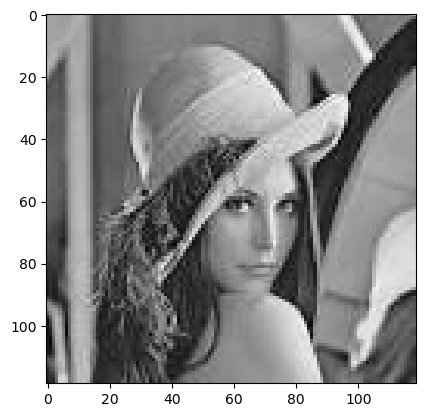

In [49]:
image = cv2.imread("../data/lena.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")
plt.show()

# Convolution

In [23]:
def convolve_window(window, kernel):
    return np.sum(window * kernel)

In [26]:
def convolve_v1(image, kernel):
    """
    Arguments:
    ----------
    - image: grayscale image who has shape of (H, W)
    - kernel: convolution filter
    """

    Hf, Wf = kernel.shape
    assert Hf % 2 == 1 and Wf % 2 == 1

    H, W = image.shape

    # compute list of [(0, 0), (0, 1), ..., (0, W-1), (1, 0), ..., (H-1, W-1)]
    h_coords = np.arange(H)
    w_coords = np.arange(W)
    coords = product(h_coords, w_coords)

    # zero-padding
    image_padded = cv2.copyMakeBorder(image, Hf//2, Hf//2, Wf//2, Wf//2, cv2.BORDER_CONSTANT, value=0)

    # convolution
    image_convolved = list(map(
        lambda coord: convolve_window(image_padded[coord[0]:coord[0]+Hf, coord[1]:coord[1]+Wf], kernel), 
        coords
    ))
    image_convolved = np.array(image_convolved, dtype=np.float32).reshape(H, W)
    return image_convolved

In [36]:
def convolve_v2(image, kernel):
    """
    Arguments:
    ----------
    - image: grayscale image who has shape of (H, W)
    - kernel: convolution filter
    """

    Hf, Wf = kernel.shape
    assert Hf % 2 == 1 and Wf % 2 == 1

    # compute list of [(0, 0), (0, 1), ..., (0, W-1), (1, 0), ..., (H-1, W-1)]
    H, W = image.shape
    h_coords, w_coords = np.indices((H, W))
    h_coords = h_coords.reshape(-1)
    w_coords = w_coords.reshape(-1)

    # zero-padding
    image_padded = cv2.copyMakeBorder(image, Hf//2, Hf//2, Wf//2, Wf//2, cv2.BORDER_CONSTANT, value=0)

    # convolution
    image_convolved = list(map(
        lambda coord: convolve_window(image_padded[coord[0]:coord[0]+Hf, coord[1]:coord[1]+Wf], kernel), 
        zip(h_coords, w_coords)
    ))
    image_convolved = np.array(image_convolved, dtype=np.float32).reshape(H, W)
    return image_convolved

In [43]:
def convolve_v3(image, kernel):
    """
    Arguments:
    ----------
    - image: grayscale image who has shape of (H, W)
    - kernel: convolution filter
    """

    # convolution
    return cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Box Filter

In [45]:
def create_box_filter(size):
    kernel = np.ones((size, size), dtype=np.float64) / (size ** 2)
    return kernel

In [46]:
box_filter_5x5 = create_box_filter(5)
box_filter_5x5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

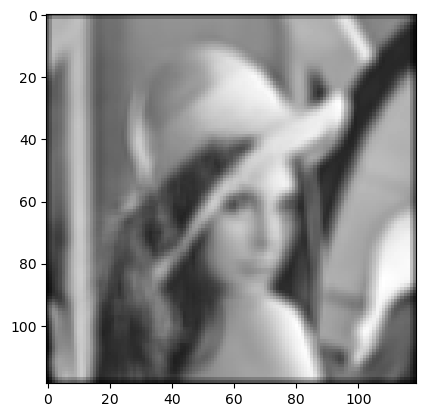

In [53]:
# image_convolved = cv2.filter2D(image.astype(np.float64), ddepth=-1, kernel=box_filter_5x5)
image_convolved = convolve_v1(image.astype(np.float64), box_filter_5x5)
plt.imshow(image_convolved, cmap="gray")
plt.show()

# Gaussian Filter

In [56]:
def create_gaussian_filter_v1(sigma):
    size = int(2 * np.pi * sigma)
    if size % 2 == 0: size += 1

    coord = np.arange(size) - size//2
    gaussian_density_1d = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (coord/sigma)**2)

    h_gaussian_density = gaussian_density_1d.reshape(size, 1)
    w_gaussian_density = gaussian_density_1d.reshape(1, size)
    gaussian_density_2d = h_gaussian_density * w_gaussian_density
    return gaussian_density_2d

def create_gaussian_filter_v2(sigma):
    size = int(2 * np.pi * sigma)
    if size % 2 == 0: size += 1

    coord = np.arange(size) - size//2
    gaussian_density_1d = np.exp(-0.5 * (coord/sigma)**2)

    h_gaussian_density = gaussian_density_1d.reshape(size, 1)
    w_gaussian_density = gaussian_density_1d.reshape(1, size)
    gaussian_density_2d = h_gaussian_density * w_gaussian_density
    gaussian_density_2d /= gaussian_density_2d.sum()
    return gaussian_density_2d

In [63]:
gaussian_filter = create_gaussian_filter_v1(1)
gaussian_filter.sum()

0.9994587918263369

In [64]:
gaussian_filter = create_gaussian_filter_v2(1)
gaussian_filter.sum()

1.0

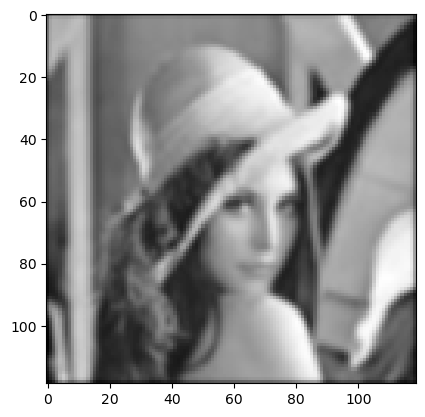

In [65]:
image_convolved = convolve_v1(image.astype(np.float64), gaussian_filter)
plt.imshow(image_convolved, cmap="gray")
plt.show()